In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as smp
from matplotlib import animation
from matplotlib.animation import PillowWriter

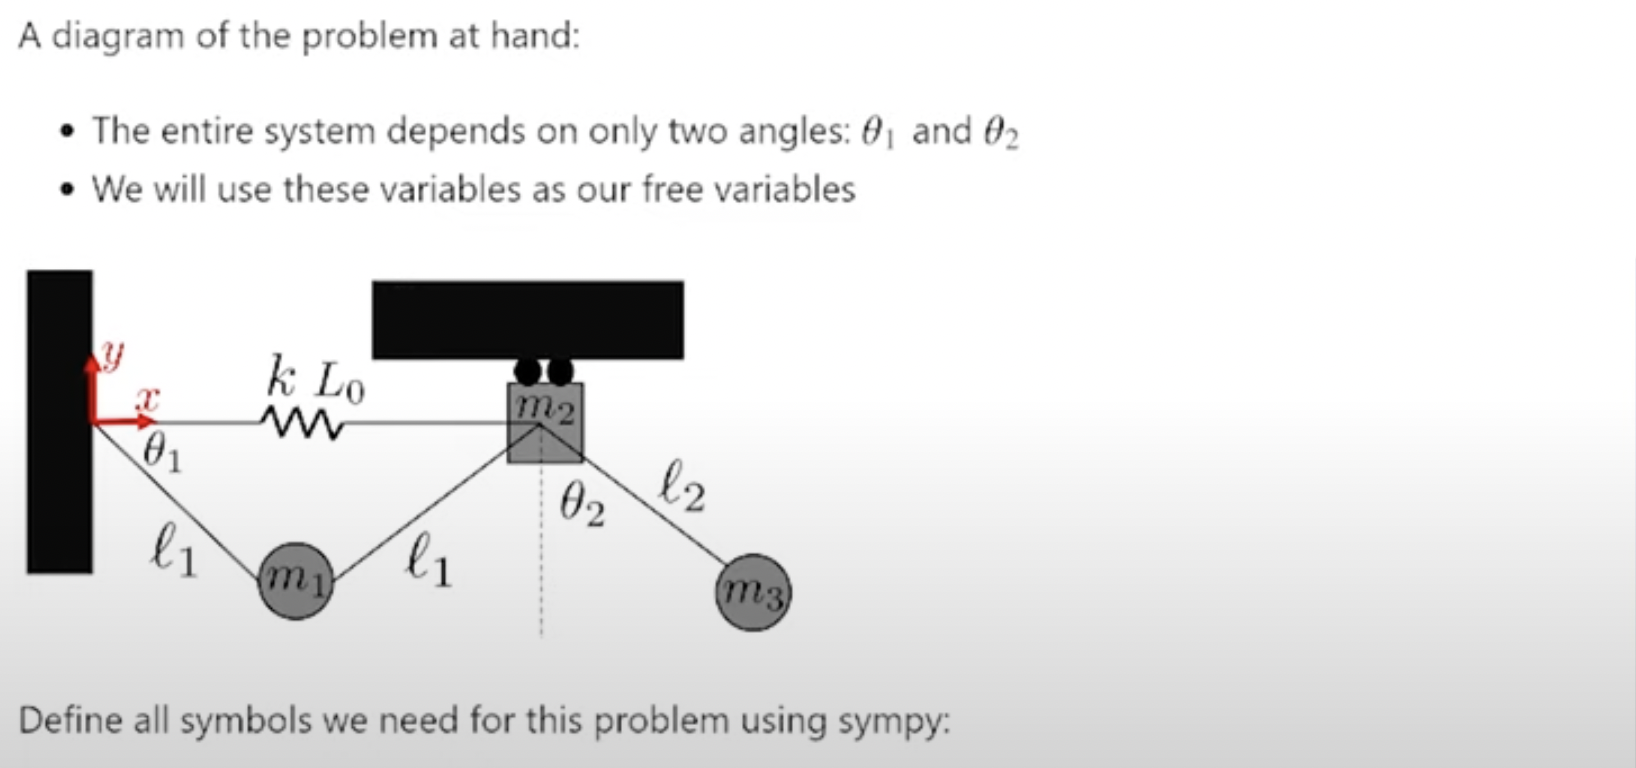

In [65]:
t, g, l1, l2, m1, m2, m3, k, L0 = smp.symbols('t g l_1 l_2 m_1 m_2 m_3 k L_0')
the1, the2 = smp.symbols(r'\theta_1 \theta_2', cls=smp.Function)

In [66]:
the1 # python knows it is a function but not with whome.

\theta_1

In [67]:
# here, we will define theta1 and theta2 as function of time
the1 = the1(t)
the2 = the2(t)

In [68]:
the1

\theta_1(t)

In [69]:
# correspondingly we will define the derivate and double derivatives
the1_d = smp.diff(the1)
the2_d = smp.diff(the2)
the1_dd = smp.diff(the1_d)
the2_dd = smp.diff(the2_d)
# As in Langrange theorm depends upon first and second differention.

In [70]:
the1_d

Derivative(\theta_1(t), t)

In [71]:
the1_dd

Derivative(\theta_1(t), (t, 2))

Let's define x and y coordinates for all the three masses

In [72]:
# position of m1 # {reference taken from wall}
x1 = l1 * smp.cos(the1)
y1 = -l1 * smp.sin(the1)

# m2

x2 = 2*x1
y2 = 0

# M3

x3 = x2 + l2 * smp.sin(the2)
y3 = - l2 * smp.cos(the2)


In [73]:
x3

2*l_1*cos(\theta_1(t)) + l_2*sin(\theta_2(t))

In [74]:
y1
# Just as we wanted

-l_1*sin(\theta_1(t))

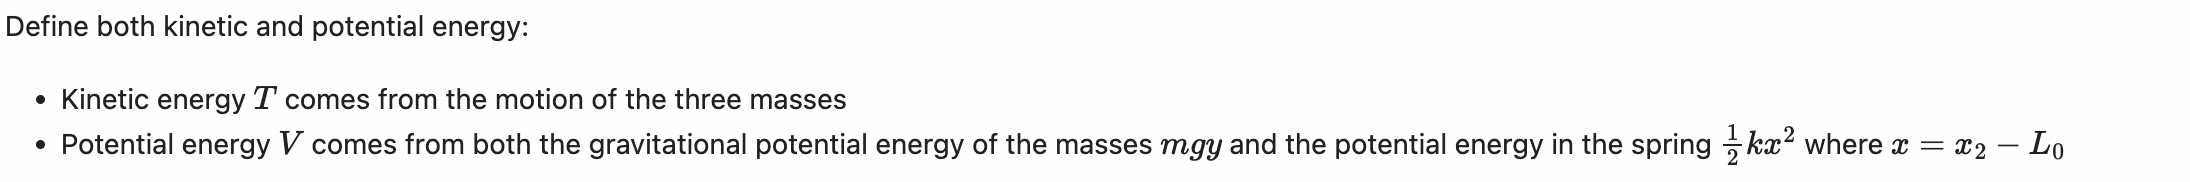

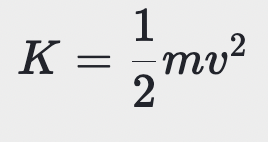
__Defining the formula for all the three masses.__

In [75]:
# Kinetic Energy
T = smp.Rational(1,2)* m1* smp.diff(x1,t)**2 + smp.diff(y1,t)\
     +smp.Rational(1,2)* m2* smp.diff(x2,t)**2 + smp.diff(y2,t)\
     +smp.Rational(1,2)* m3* smp.diff(x3,t)**2 + smp.diff(y3,t) # vector addition of x and y velocitied

In [76]:
# Potential Energy
V = m1 * g*y1 + m2*g*y2 +m3*g*y3 + smp.Rational(1,2)* k * (x2-L0)**2 # expension = x2-L0

In [77]:
L = T - V # Classic Langrange Mechenics

In [78]:
# Now we can look at the Lagrangian
L

g*l_1*m_1*sin(\theta_1(t)) + g*l_2*m_3*cos(\theta_2(t)) - k*(-L_0 + 2*l_1*cos(\theta_1(t)))**2/2 + l_1**2*m_1*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2/2 + 2*l_1**2*m_2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 - l_1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*sin(\theta_2(t))*Derivative(\theta_2(t), t) + m_3*(-2*l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2/2

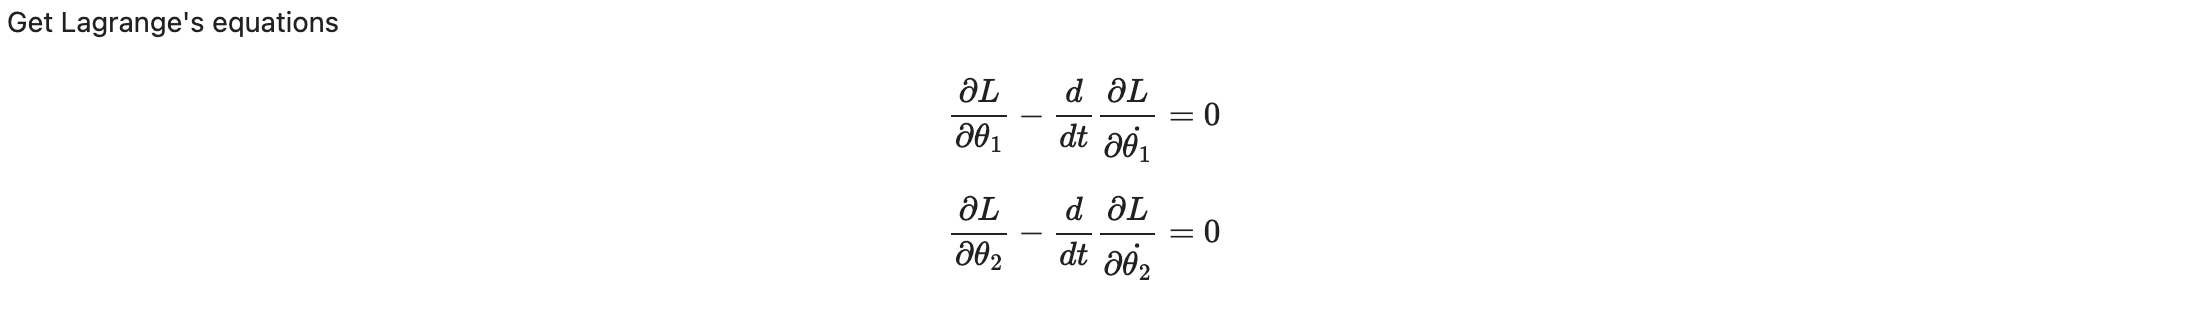

In [79]:
smp.diff(L,g)

l_1*m_1*sin(\theta_1(t)) + l_2*m_3*cos(\theta_2(t))

In [80]:
smp.diff(L,the1)

g*l_1*m_1*cos(\theta_1(t)) + 2*k*l_1*(-L_0 + 2*l_1*cos(\theta_1(t)))*sin(\theta_1(t)) + l_1**2*m_1*sin(\theta_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + 4*l_1**2*m_2*sin(\theta_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 - 2*l_1*m_3*(-2*l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) + l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t)

In [81]:
# Similarly
smp.diff(L,the1_d)
# same can be dome for the swcond equation

l_1**2*m_1*sin(\theta_1(t))**2*Derivative(\theta_1(t), t) + 4*l_1**2*m_2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t) - 2*l_1*m_3*(-2*l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_1(t)) - l_1*cos(\theta_1(t))

In [82]:
# let's Solve both the Equations
LE1 = smp.diff(L,the1) - smp.diff(smp.diff(L,the1_d),t).simplify()
LE2 = smp.diff(L,the2) - smp.diff(smp.diff(L,the2_d),t).simplify()

In [83]:
LE1

g*l_1*m_1*cos(\theta_1(t)) + 2*k*l_1*(-L_0 + 2*l_1*cos(\theta_1(t)))*sin(\theta_1(t)) + l_1**2*m_1*sin(\theta_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + 4*l_1**2*m_2*sin(\theta_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 - 2*l_1*m_3*(-2*l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) - l_1*(l_1*m_1*sin(\theta_1(t))**2*Derivative(\theta_1(t), (t, 2)) + l_1*m_1*sin(2*\theta_1(t))*Derivative(\theta_1(t), t)**2 + 4*l_1*m_2*sin(\theta_1(t))**2*Derivative(\theta_1(t), (t, 2)) + 4*l_1*m_2*sin(2*\theta_1(t))*Derivative(\theta_1(t), t)**2 + 2*m_3*(2*l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) + 2*m_3*(2*l_1*sin(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + 2*l_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + l_2*sin(\theta_2(t))*Derivative(\theta_2(t), t)**2 - l_2*cos(\theta_2(t))

In [84]:
LE2 # In Sympy Equations are assumed equal to zero by defult

-g*l_2*m_3*sin(\theta_2(t)) - l_2*m_3*(-2*l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_2(t))*Derivative(\theta_2(t), t) - l_2*(m_3*(2*l_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_2(t))*Derivative(\theta_2(t), t) - m_3*(2*l_1*sin(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + 2*l_1*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + l_2*sin(\theta_2(t))*Derivative(\theta_2(t), t)**2 - l_2*cos(\theta_2(t))*Derivative(\theta_2(t), (t, 2)))*cos(\theta_2(t)) + cos(\theta_2(t))*Derivative(\theta_2(t), t)) + l_2*cos(\theta_2(t))*Derivative(\theta_2(t), t)

# !!!!!!!! WHAT THE HECK !!!!!!!!!! I can't Take that.
# ********* BUT WHAT DO I OBSEVE THE THE 2nd DERIVATES ARE ALL IN FORM OF SIMPLE LINEAR EQUATIONS.
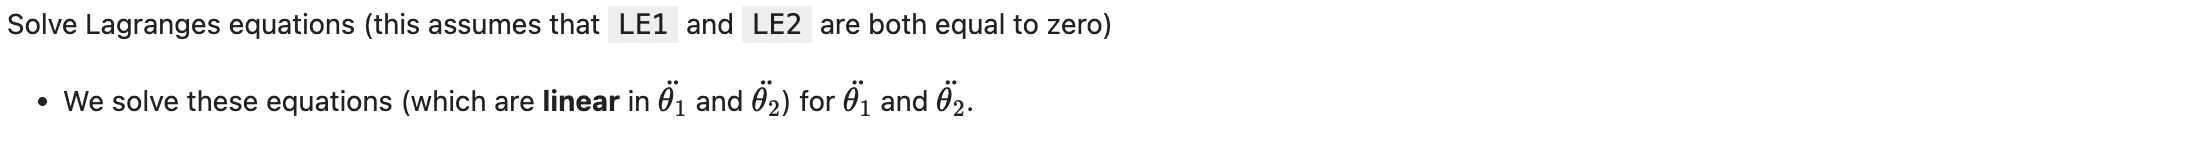

In [85]:
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd),
                simplify=False, rational=False)
# [LE1, LE2] are put equaled to zero and soved for 2nd Derivative

In [86]:
sols

{Derivative(\theta_1(t), (t, 2)): -2*L_0*k*sin(\theta_1(t))*cos(\theta_2(t))/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) + g*m_1*cos(\theta_1(t))*cos(\theta_2(t))/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) - 2*g*m_3*sin(\theta_1(t))*sin(\theta_2(t))/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) + 4*k*l_1*sin(\theta_1(t))*cos(\theta_1(t))*cos(\theta_2(t))/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) + l_1*m_1*sin(\theta_1(t))*cos(\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)**2/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) - l_1*m_1*sin(2*\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)**2/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) + 4*l_1*m_2*sin(\theta_1(t))*cos(

In [87]:
# WE CAN EXCESS particulat file by defining
sols[the1_dd]
# this is what the1_dd equals to
# This is a second Order Differential Equation.

-2*L_0*k*sin(\theta_1(t))*cos(\theta_2(t))/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) + g*m_1*cos(\theta_1(t))*cos(\theta_2(t))/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) - 2*g*m_3*sin(\theta_1(t))*sin(\theta_2(t))/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) + 4*k*l_1*sin(\theta_1(t))*cos(\theta_1(t))*cos(\theta_2(t))/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) + l_1*m_1*sin(\theta_1(t))*cos(\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)**2/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) - l_1*m_1*sin(2*\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)**2/(l_1*m_1*sin(\theta_1(t))**2*cos(\theta_2(t)) + 4*l_1*m_2*sin(\theta_1(t))**2*cos(\theta_2(t))) + 4*l_1*m_2*sin(\theta_1(t))*cos(\theta_1(t))*cos(\theta_2(t))*Deri

In [88]:
sols[the2_dd]

-4*L_0*k*sin(\theta_1(t))*cos(\theta_2(t))/(l_2*m_1*sin(\theta_1(t))*cos(\theta_2(t))**2 + 4*l_2*m_2*sin(\theta_1(t))*cos(\theta_2(t))**2) - g*m_1*sin(\theta_1(t))*sin(\theta_2(t))/(l_2*m_1*sin(\theta_1(t))*cos(\theta_2(t))**2 + 4*l_2*m_2*sin(\theta_1(t))*cos(\theta_2(t))**2) + 2*g*m_1*cos(\theta_1(t))*cos(\theta_2(t))/(l_2*m_1*sin(\theta_1(t))*cos(\theta_2(t))**2 + 4*l_2*m_2*sin(\theta_1(t))*cos(\theta_2(t))**2) - 4*g*m_2*sin(\theta_1(t))*sin(\theta_2(t))/(l_2*m_1*sin(\theta_1(t))*cos(\theta_2(t))**2 + 4*l_2*m_2*sin(\theta_1(t))*cos(\theta_2(t))**2) - 4*g*m_3*sin(\theta_1(t))*sin(\theta_2(t))/(l_2*m_1*sin(\theta_1(t))*cos(\theta_2(t))**2 + 4*l_2*m_2*sin(\theta_1(t))*cos(\theta_2(t))**2) + 8*k*l_1*sin(\theta_1(t))*cos(\theta_1(t))*cos(\theta_2(t))/(l_2*m_1*sin(\theta_1(t))*cos(\theta_2(t))**2 + 4*l_2*m_2*sin(\theta_1(t))*cos(\theta_2(t))**2) + 4*l_1*m_1*sin(\theta_1(t))*cos(\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)**2/(l_2*m_1*sin(\theta_1(t))*cos(\theta_2(t))**2 + 4*l_2

In [89]:
sols[the1_d] # It will give an error ok

KeyError: Derivative(\theta_1(t), t)

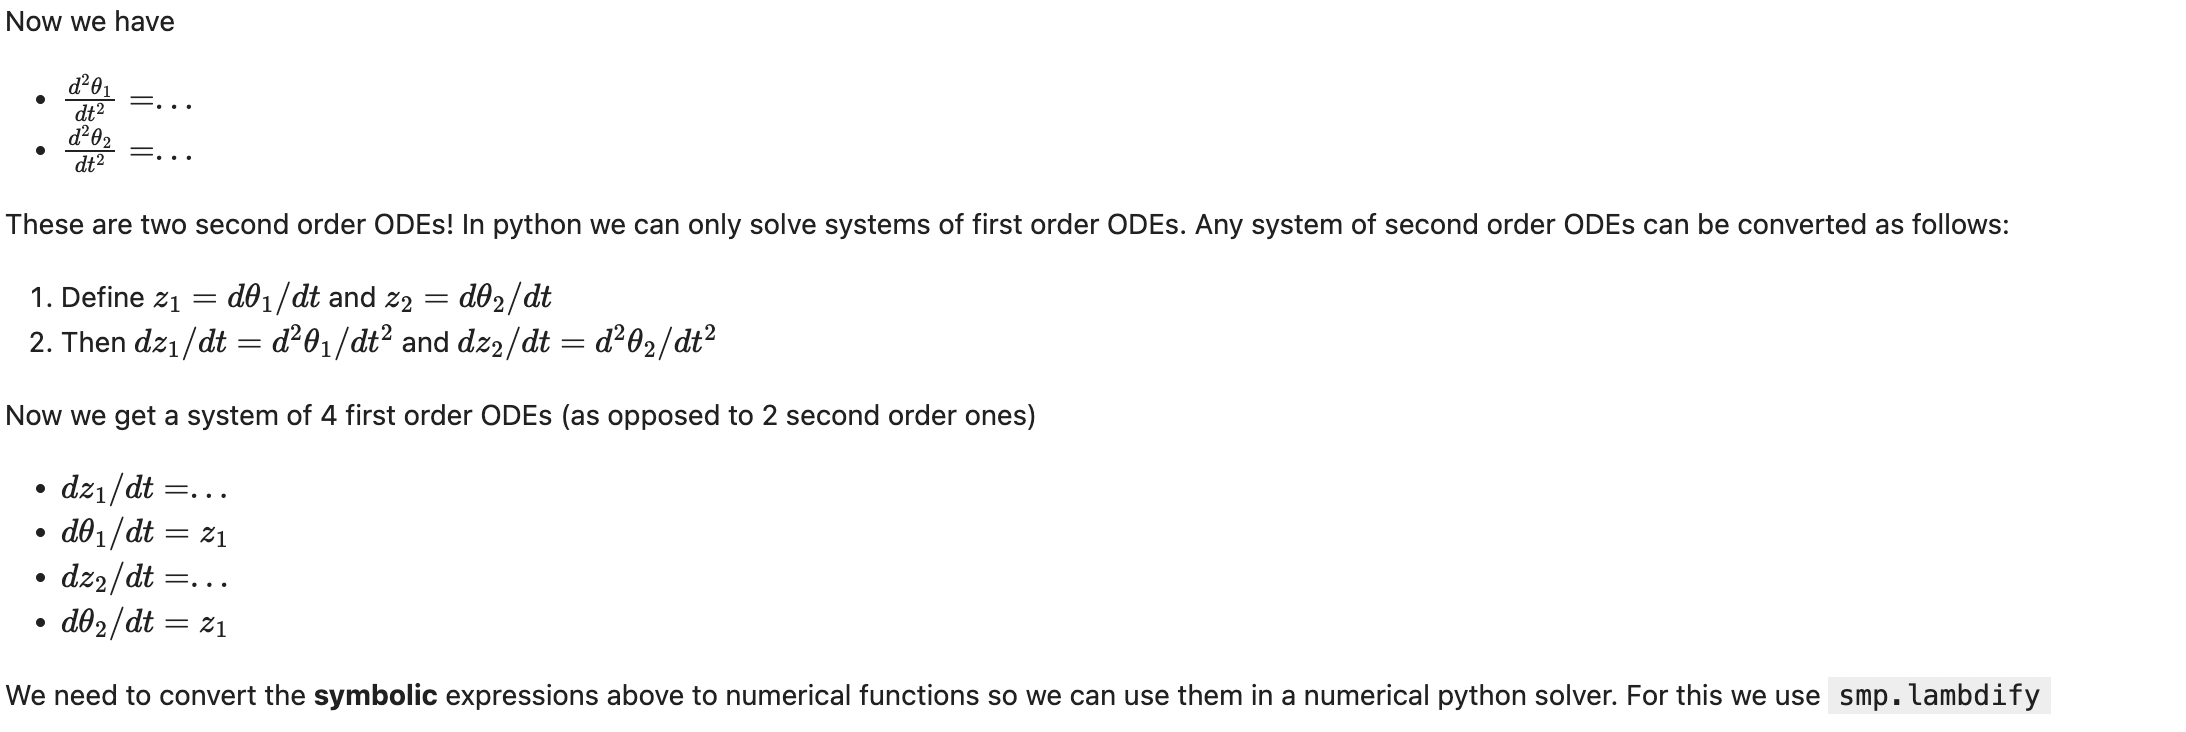

In [90]:
# LET's define them down
dz1dt_f = smp.lambdify((t,g,k,L0,m1,m2,m3,l1,l2,the1,the2,the1_d,the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t,g,k,L0,m1,m2,m3,l1,l2,the1,the2,the1_d,the2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

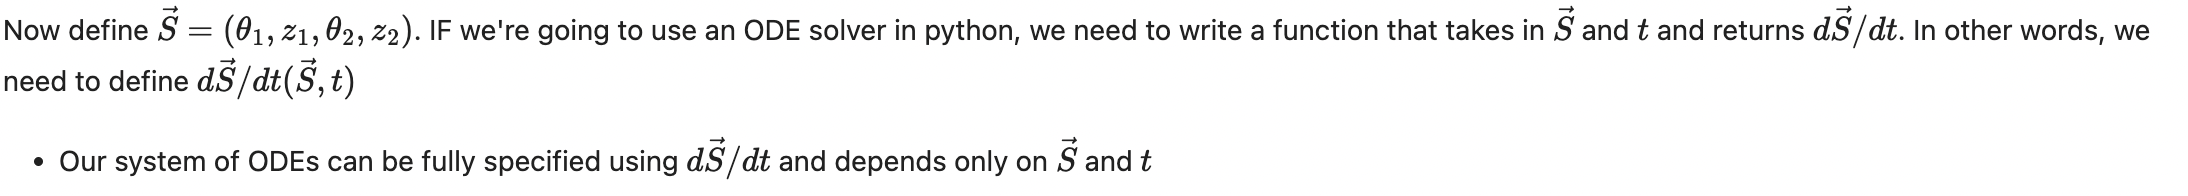
__DIFFERENTIAL EQUATION __ JUST GET ITS SOLUTION __

In [91]:
def dSdt(S, t, g, k, L0, m1, m2, m3, l1, l2):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t,g,k,L0,m1,m2,m3,l1,l2,the1,the2,z1,z2),
        dthe2dt_f(z2),
        dz2dt_f(t,g,k,L0,m1,m2,m3,l1,l2,the1,the2,z1,z2),
    ]

In [92]:
# Solve the system of ODEs using scipys odeint method
t = np.linspace(0, 40, 1001) # s
g = 9.81 #m/s^2
k = 30 # N/m
m1=2 # kg
m2=2 # kg
m3=1 # kg
l1 = 1 # m
l2 = 1 # m
L0 = 1.5*l1 # m
ans = odeint(dSdt, y0=[1, -1, -1, 1], t=t, args=(g, k, L0, m1, m2, m3, l1, l2))

/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [93]:
ans

array([[ 1.        , -1.        , -1.        ,  1.        ],
       [ 0.96127216, -0.93498883, -0.93587829,  2.13341291],
       [ 0.92526141, -0.86515786, -0.83526488,  2.83144425],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [94]:
ans.T

array([[ 1.        ,  0.96127216,  0.92526141, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -0.93498883, -0.86515786, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -0.93587829, -0.83526488, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  2.13341291,  2.83144425, ...,  0.        ,
         0.        ,  0.        ]])

In [95]:
the1 = ans.T[0]
the2 = ans.T[2]

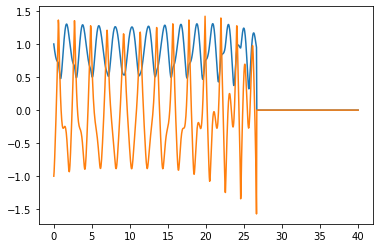

In [96]:
plt.plot(t, the1)
plt.plot(t, the2)

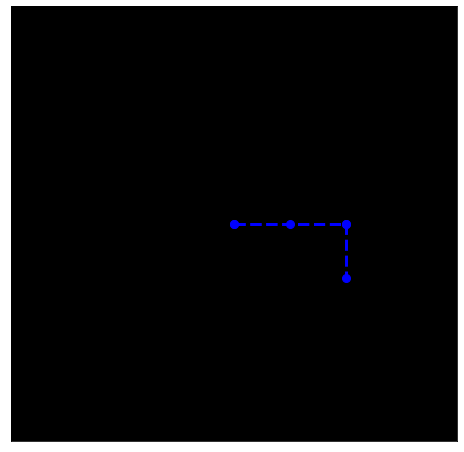

In [99]:
def get_x1y1x2y2x3y3(t, the1, the2, l1, l2):
    return (l1*np.cos(the1),
            -l1*np.sin(the1),
            2*l1*np.cos(the1),
            np.zeros(len(the1)),
            2*l1*np.cos(the1) + l2*np.sin(the2),
            -l2*np.cos(the2))

x1, y1, x2, y2, x3, y3 = get_x1y1x2y2x3y3(t, ans.T[0], ans.T[2], l1, l2)

#Here is the code for a simple animation

def animate(i):
    ln1.set_data([0, x1[i], x2[i], x3[i]], [0, y1[i], y2[i], y3[i]])
    ln2.set_data([0, x2[i]], [0, y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'bo--', lw=3, markersize=8)
ln2, = plt.plot([], [], 'bo--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen1.gif',writer='pillow',fps=25)